In [21]:
import numpy as np

In [58]:
m = 100
X = 6 * np.random.rand(m,1) - 3

In [23]:
X

array([[ 1.76395755],
       [-1.25571665],
       [-0.11148166],
       [-2.91105754],
       [-2.98675871],
       [-2.74049552],
       [-0.09111221],
       [ 1.71328486],
       [-0.43376536],
       [ 2.72899239],
       [ 1.82489758],
       [ 1.47075643],
       [ 0.45135684],
       [-2.51439353],
       [ 2.02289308],
       [ 1.81329099],
       [ 1.02825715],
       [-2.5691503 ],
       [-0.07117502],
       [-0.22240963],
       [-0.81713292],
       [-0.98445701],
       [-0.65544811],
       [ 1.28986432],
       [-0.86047906],
       [-1.34394979],
       [-1.90255101],
       [ 2.1764157 ],
       [ 0.59674156],
       [-1.39736664],
       [-1.90383995],
       [ 0.04010851],
       [-0.3620284 ],
       [ 2.64349809],
       [-1.72994927],
       [-0.82039283],
       [-1.57291335],
       [-1.49144757],
       [ 2.68738515],
       [-1.34162798],
       [ 1.40463188],
       [-2.561946  ],
       [ 1.08923771],
       [-2.75562105],
       [ 1.41322021],
       [-2

In [59]:
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [25]:
import matplotlib.pyplot as plt

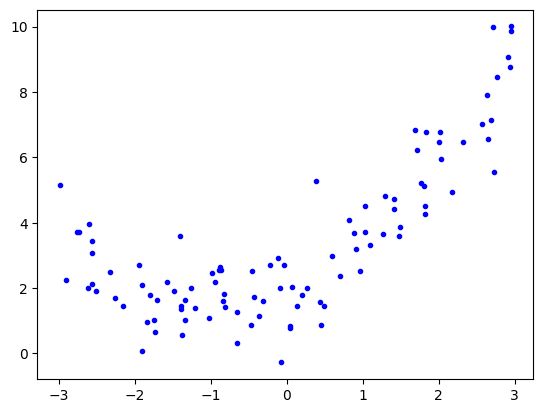

In [26]:
plt.plot(X, y, "b.")

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
poly_features = PolynomialFeatures(degree = 2,  include_bias = False)

In [29]:
X_poly = poly_features.fit_transform(X)

In [30]:
X[0]

array([1.76395755])

In [31]:
X_poly[0]

array([1.76395755, 3.11154624])

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lin_reg = LinearRegression()

In [34]:
lin_reg.fit(X_poly, y)

LinearRegression()

In [35]:
lin_reg.intercept_, lin_reg.coef_

(array([1.94367531]), array([[0.94623154, 0.49271339]]))

In [36]:
lin_reg.coef_[:,0]

array([0.94623154])

[]

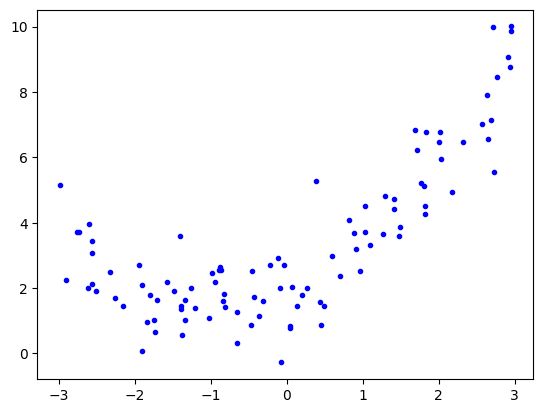

In [37]:
plt.plot(X, y, "b.")
#plt.plot(X, y_pred, "r-", linewidth = 2)
plt.plot()



If your x-values (the values on the horizontal axis) are not in ascending order, the plotting function will connect the dots in the order they are provided.

[]

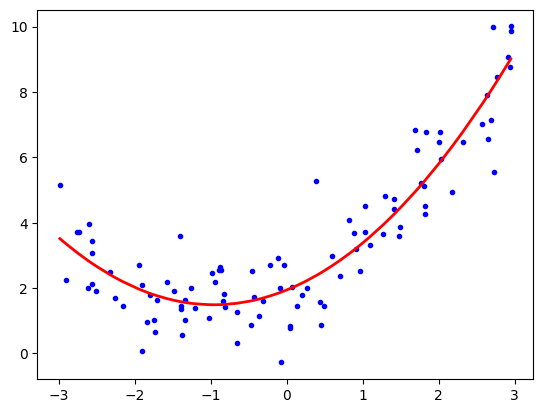

In [38]:
plt.plot(X, y, "b.")
y_pred = lin_reg.coef_[:,1]*np.sort(X,axis = 0)**2 + lin_reg.coef_[:,0]*np.sort(X,axis = 0) + lin_reg.intercept_
plt.plot(np.sort(X,axis = 0), y_pred, "r-", linewidth = 2)
plt.plot()

In [39]:
x_new = np.linspace(-3, 3, 100).reshape(100,1)

In [40]:
x_new

array([[-3.        ],
       [-2.93939394],
       [-2.87878788],
       [-2.81818182],
       [-2.75757576],
       [-2.6969697 ],
       [-2.63636364],
       [-2.57575758],
       [-2.51515152],
       [-2.45454545],
       [-2.39393939],
       [-2.33333333],
       [-2.27272727],
       [-2.21212121],
       [-2.15151515],
       [-2.09090909],
       [-2.03030303],
       [-1.96969697],
       [-1.90909091],
       [-1.84848485],
       [-1.78787879],
       [-1.72727273],
       [-1.66666667],
       [-1.60606061],
       [-1.54545455],
       [-1.48484848],
       [-1.42424242],
       [-1.36363636],
       [-1.3030303 ],
       [-1.24242424],
       [-1.18181818],
       [-1.12121212],
       [-1.06060606],
       [-1.        ],
       [-0.93939394],
       [-0.87878788],
       [-0.81818182],
       [-0.75757576],
       [-0.6969697 ],
       [-0.63636364],
       [-0.57575758],
       [-0.51515152],
       [-0.45454545],
       [-0.39393939],
       [-0.33333333],
       [-0

In [41]:
x_new_poly = poly_features.transform(x_new)

In [42]:
y_new = lin_reg.predict(x_new_poly)

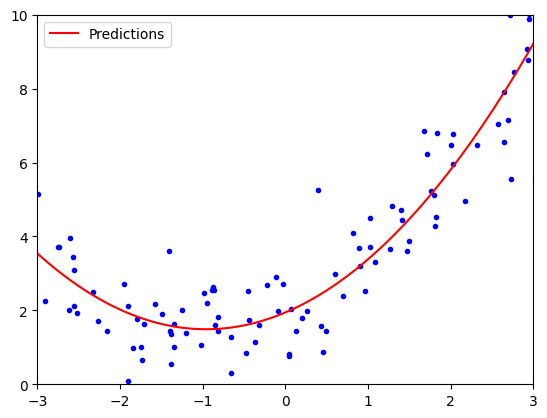

In [43]:
plt.plot(X, y, "b.")
plt.plot(x_new, y_new, "r", label = "Predictions")
plt.axis((-3,3, 0, 10))
plt.legend(loc="best")

In [44]:
X_sorted = np.sort(X, axis = 0)

In [45]:
X_sorted

array([[-2.98675871],
       [-2.91105754],
       [-2.75562105],
       [-2.74049552],
       [-2.61631856],
       [-2.60240123],
       [-2.5691503 ],
       [-2.561946  ],
       [-2.56163897],
       [-2.51439353],
       [-2.33072307],
       [-2.26746675],
       [-2.1576623 ],
       [-1.94992156],
       [-1.90383995],
       [-1.90255101],
       [-1.83877484],
       [-1.79778627],
       [-1.74338749],
       [-1.72994927],
       [-1.71078445],
       [-1.57291335],
       [-1.49144757],
       [-1.40944141],
       [-1.39736664],
       [-1.38918478],
       [-1.38069164],
       [-1.34394979],
       [-1.34162798],
       [-1.25571665],
       [-1.20390796],
       [-1.02546285],
       [-0.98445701],
       [-0.9480583 ],
       [-0.88606702],
       [-0.88046331],
       [-0.86047906],
       [-0.84560259],
       [-0.82039283],
       [-0.81713292],
       [-0.66182785],
       [-0.65544811],
       [-0.47772038],
       [-0.45313034],
       [-0.43376536],
       [-0

# Learning Curves

In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
def plot_learning_curves(model, X, y, **kwargs ):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 42)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label = "train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "val")
    plt.legend(loc="best")
    plt.xlabel("Training Set Size")
    plt.ylabel("RMSE")

    if kwargs:
        axes = kwargs["axis"]
        plt.axis(axes)

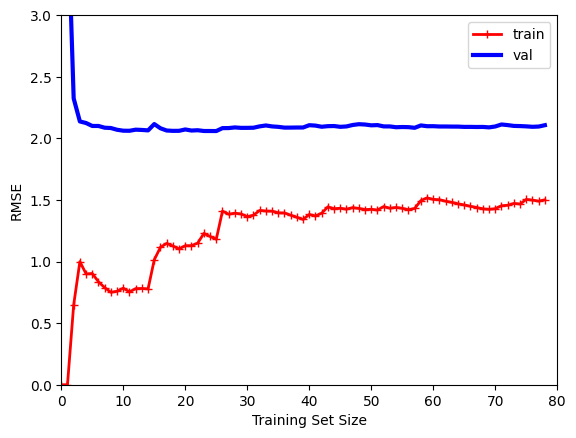

In [49]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y, axis = [0, 80, 0.0, 3.0])

In [50]:
from sklearn.pipeline import Pipeline

In [51]:
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 10, include_bias = False)),
    ("lin_reg", LinearRegression()),
])

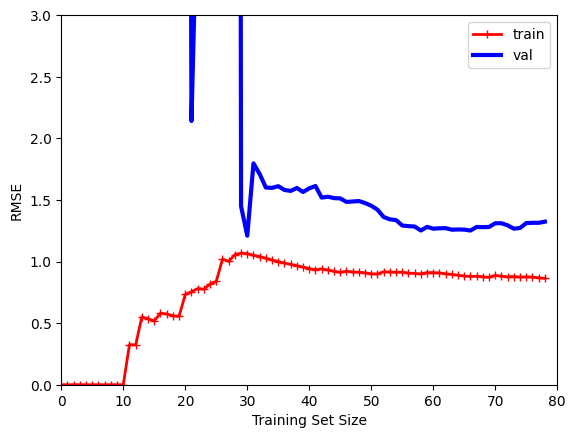

In [52]:
plot_learning_curves(polynomial_regression, X, y, axis = [0, 80, 0.0, 3.0])

# Ridge Regression

In [53]:
from sklearn.linear_model import Ridge

In [54]:
ridge_reg = Ridge(alpha = 1, solver = "cholesky")

In [61]:
ridge_reg.fit(X, y)

Ridge(alpha=1, solver='cholesky')

In [62]:
ridge_reg.predict([[1.5]])

array([5.09750638])

In [63]:
from  sklearn.linear_model import SGDRegressor

using gradient descent: 

In [64]:
sgd_reg = SGDRegressor(penalty="l2")

In [65]:
sgd_reg.fit(X, y)

c:\Users\Hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor()

In [66]:
sgd_reg.predict([[1.5]])

array([5.07197588])